In [ ]:
#default_exp vision.core

In [ ]:
#export
from local.imports import *
from local.test import *
from local.core import *
from local.data.pipeline import *
from local.data.core import *
from local.data.external import *

from PIL import Image

In [ ]:
#export
_all_ = ['Image']

# Core vision
> Basic image opening/processing functionality

In [ ]:
path = untar_data(URLs.MNIST_TINY)
fns = get_image_files(path)
fn = fns[0]; fn

PosixPath('/home/ubuntu/git/fastai_docs/dev/data/mnist_tiny/test/4605.png')

In [ ]:
#export
class Imagify(Transform):
    "Open an `Image` from path `fn`, show with `**kwargs`"
    def __init__(self, func=Image.open, **kwargs): self.func,self.assoc = func,ImageItem(**kwargs)
    def encodes(self, fn): return Image.open(fn)

In [ ]:
timg = Imagify()
img = timg(fn)
test_eq(img.size, (28,28))
img

## Functions

In [ ]:
#export
class ImageConverter(Transform):
    "Convert `img` to `mode`"
    def __init__(self, mode='RGB', mask=None, is_tuple=None):
        super().__init__(mask=mask, is_tuple=is_tuple)
        self.mode = mode

    def encodes(self, o): return o.convert(self.mode)

In [ ]:
f = ImageConverter('RGB')
test_eq(f(img).mode, 'RGB')

In [ ]:
#export
def image_resize(img, size, resample=Image.BILINEAR):
    "Resize image to `size` using `resample"
    return img.resize(size, resample=resample)
image_resize.order=10

In [ ]:
#export
class ImageResizer(Transform):
    "Resize image to `size` using `resample"
    def __init__(self, size, resample=Image.BILINEAR, mask=None, is_tuple=None):
        super().__init__(mask=mask, is_tuple=is_tuple)
        if not is_listy(size): size=(size,size)
        self.size,self.resample = size,resample

    def encodes(self, o): return image_resize(o, size=self.size, resample=self.resample)

In [ ]:
f = ImageResizer(14)
test_eq(f(img).size, (14,14))
img

In [ ]:
# export
def image2byte(img):
    "Transform image to byte tensor in `c*h*w` dim order."
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes()))
    w,h = img.size
    return res.view(h,w,-1).permute(2,0,1)

In [ ]:
# export
def unpermute_image(img):
    "Convert `c*h*w` dim order to `h*w*c` (or just `h*w` if 1 channel)"
    return img[0] if img.shape[0] == 1 else img.permute(1,2,0)

In [ ]:
#export
class ImageToByteTensor(Transform):
    "Transform image to byte tensor in `c*h*w` dim order."
    order=15
    def encodes(self, o): return image2byte(o)
    def decodes(self, o): return unpermute_image(o)

In [ ]:
tfm = ImageToByteTensor()
t = tfm(img)
test_eq(t.shape, (1,28,28))

The permutation of axes needs to be reversed for display, so we define `decodes`.

In [ ]:
test_eq(tfm.decode(t).shape, (28,28))

Let's confirm we can pipeline this with `Imagify`.

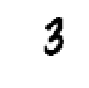

In [ ]:
pipe = Pipeline([Imagify(cmap="Greys", figsize=(1,1)), ImageToByteTensor()])
pipe.setup()
img = pipe(fn)
test_eq(img.shape, (1,28,28))
pipe.show(img);

## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core.ipynb.
Converted 02_data_pipeline.ipynb.
Converted 03_data_external.ipynb.
Converted 04_data_core.ipynb.
Converted 05_data_source.ipynb.
Converted 06_vision_core.ipynb.
Converted 07_pets_tutorial.ipynb.
Converted 08_augmentation.ipynb.
Converted 10_layers.ipynb.
Converted 11_optimizer.ipynb.
Converted 12_learner.ipynb.
Converted 90_notebook_core.ipynb.
Converted 91_notebook_export.ipynb.
Converted 92_notebook_showdoc.ipynb.
Converted 93_notebook_export2html.ipynb.
Converted 94_index.ipynb.
